## Imports

In [43]:
import pandas as pd
import os
import numpy as np
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import seaborn as sns
import warnings
from shapely import wkt
warnings.filterwarnings('ignore')

Define folder path

In [44]:
# use the output folder patha
routing_output_folder_path = os.path.join('..', '..', 'data','02_intermediate_output','routing')
figure_output_folder_path = os.path.join('..', '..', 'data','03_final_figures')

In [45]:

# Read each CSV file into separate DataFrames using the full path
route_data_01 = pd.read_csv(os.path.join(routing_output_folder_path, 'route_data_0.1.csv'))
route_data_02 = pd.read_csv(os.path.join(routing_output_folder_path, 'route_data_0.2.csv'))
route_data_03 = pd.read_csv(os.path.join(routing_output_folder_path, 'route_data_0.3.csv'))
route_data_04 = pd.read_csv(os.path.join(routing_output_folder_path, 'route_data_0.4.csv'))
route_data_05 = pd.read_csv(os.path.join(routing_output_folder_path, 'route_data_0.5.csv'))
route_data_06 = pd.read_csv(os.path.join(routing_output_folder_path, 'route_data_0.6.csv'))
route_data_07 = pd.read_csv(os.path.join(routing_output_folder_path, 'route_data_0.7.csv'))
route_data_08 = pd.read_csv(os.path.join(routing_output_folder_path, 'route_data_0.8.csv'))
route_data_09 = pd.read_csv(os.path.join(routing_output_folder_path, 'route_data_0.9.csv'))
route_data_10 = pd.read_csv(os.path.join(routing_output_folder_path, 'route_data_1.0.csv'))

In [46]:
def filter_and_save_dfs():
    for crime_weight in [round(x * 0.1, 1) for x in range(1, 11)]:
        csv_str = str(crime_weight).replace(".", "").zfill(2)
        df_name = f'route_data_{csv_str}'

        df = globals().get(df_name)

        if df is not None:
            filtered_data = df[df['percentage_increase_dur'] < 400]
            globals()[df_name] = filtered_data

# Call the function to filter all DataFrames
filter_and_save_dfs()

## Plot percentage increase for all weight

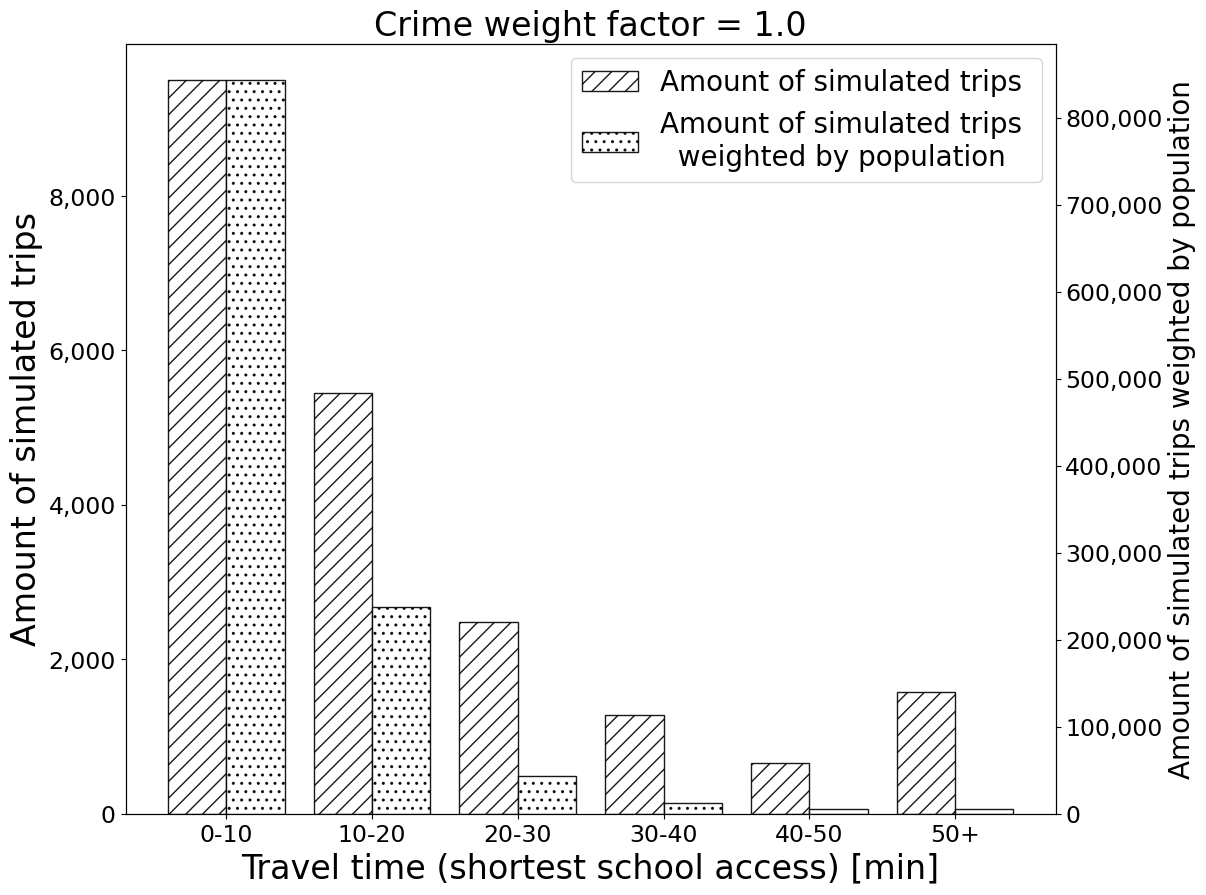

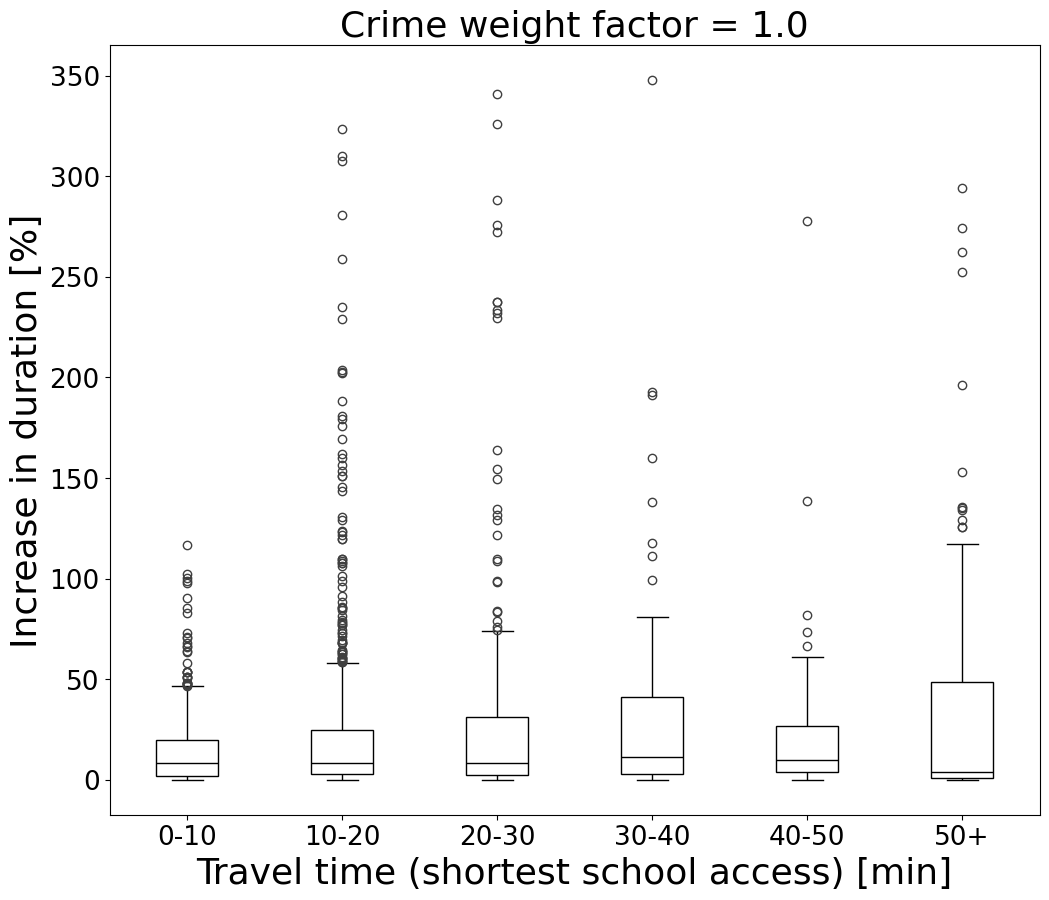

In [47]:
def plot_data(route_df, crime_weight):
    # Group by duration bins
    trip_counts = route_df.groupby('duration_bins_safe')['Id'].count().reset_index()
    trip_counts.columns = ['duration_bins', 'trip_count']
    grouped_sum = route_df.groupby('duration_bins_safe')['total_population'].sum().reset_index()
    grouped_sum.columns = ['duration_bins', 'pop_weight']
    perc_merged_data = pd.merge(trip_counts, grouped_sum, on='duration_bins')

    # Plotting
    fig, ax1 = plt.subplots(figsize=(12, 10))

    # Define bar width and positions
    bar_width = 0.4
    r1 = range(len(perc_merged_data['duration_bins']))
    r2 = [x + bar_width for x in r1]

    # Plot number of trips
    ax1.bar(r1, perc_merged_data['trip_count'], width=bar_width, edgecolor='black', facecolor='white', alpha=0.9, label='Amount of simulated trips', hatch='//')
    ax1.set_xlabel('Travel time (shortest school access) [min]', fontsize=24)
    ax1.set_ylabel('Amount of simulated trips', color='black', fontsize=24)
    ax1.tick_params(axis='y', labelcolor='black', labelsize=17)
    ax1.set_xticks([r + bar_width / 2 for r in range(len(perc_merged_data['duration_bins']))])
    ax1.set_xticklabels(perc_merged_data['duration_bins'], fontsize=17)

    # Formatter for thousand separator
    formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
    ax1.yaxis.set_major_formatter(formatter)

    # Add light background grid lines
    # ax1.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

    # Create second y-axis for population-weighted trips
    ax2 = ax1.twinx()
    ax2.bar(r2, perc_merged_data['pop_weight'], width=bar_width, edgecolor='black', facecolor='white', alpha=0.9, label='Amount of simulated trips \n  weighted by population', hatch='..')
    ax2.set_ylabel('Amount of simulated trips weighted by population', color='black', fontsize=20)
    ax2.tick_params(axis='y', labelcolor='black', labelsize=17)
    ax2.yaxis.set_major_formatter(formatter)

    # Adding legends
    fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes, fontsize=20)

    plt.title('Crime weight factor = ' + str(crime_weight), fontsize=24)
    
    output_file_path = os.path.join(figure_output_folder_path, f'{crime_weight}_increase_in_duration.png')
    plt.savefig(output_file_path)  
    plt.show()

    # Plot percentage increase
    filtered_df = route_df[route_df['percentage_increase_dur'] != 0]  # Filter similar routes
    filtered_df = filtered_df.sort_values(by='duration_bins_safe')

    # Plot percentage increase
    plt.figure(figsize=(12, 10))
    sns.boxplot(x='duration_bins_safe', y='percentage_increase_dur', data=filtered_df, 
                boxprops=dict(facecolor='white', edgecolor='black'), 
                whiskerprops=dict(color='black'), 
                capprops=dict(color='black'), 
                medianprops=dict(color='black'), 
                width=0.4)

    # Set labels and title
    plt.xlabel('Travel time (shortest school access) [min]', fontsize=26)
    plt.ylabel('Increase in duration [%]', fontsize=26)
    plt.title('Crime weight factor = ' + str(crime_weight), fontsize=26)
    plt.xticks(rotation=0, fontsize=19)
    plt.yticks(fontsize=19)

    # Save the plot without grid lines
    output_file_path = os.path.join(figure_output_folder_path, f'{crime_weight}_amount.png')
    plt.savefig(output_file_path)
    plt.show()

plot_data(route_data_10, 1.0)

to plot for all weight

In [48]:
# csv_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1.0]
# # csv_values = [1.0]

# # Iterate through crime_weight values from 0.1 to 1.0
# for crime_weight in [round(x * 0.1, 1) for x in range(1, 11)]:
#     csv_str = str(crime_weight).replace(".", "")
#     exec(f'plot_data(route_data_{csv_str}, {crime_weight})')

In [49]:

# Group by duration bins
trip_counts = route_data_10.groupby('duration_bins_safe')['Id'].count().reset_index()
trip_counts.columns = ['duration_bins', 'trip_count']
grouped_sum = route_data_10.groupby('duration_bins_safe')['total_population'].sum().reset_index()
grouped_sum.columns = ['duration_bins', 'pop_weight']
perc_merged_data = pd.merge(trip_counts, grouped_sum, on='duration_bins')
perc_merged_data

,duration_bins,trip_count,pop_weight
0,0-10,9497,842733.669427
1,10-20,5450,237535.927960
2,20-30,2487,43272.220463
3,30-40,1273,12333.900103
4,40-50,657,5088.408734
5,50+,1579,5726.665401


## Plot percentage increase  for each crime weight

In [50]:
filtered_dfs = []
for i in range(1, 11):
    df = eval(f'route_data_{i:02}')
    filtered_df = df[df['percentage_increase_dur'] != 0]  ## filtered simialr route
    filtered_dfs.append(filtered_df)

# Extracting and renaming percentage_increase columns
percentage_increase_columns = []
csv_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for i, (filtered_df, csv_value) in enumerate(zip(filtered_dfs, csv_values), start=1):
    col = filtered_df['percentage_increase_dur'].rename(f'{csv_value}')
    percentage_increase_columns.append(col)

# Combining the filtered data into a single DataFrame
combined_df = pd.concat([col.reset_index(drop=True) for col in percentage_increase_columns], axis=1)
combined_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,9.593911,22.927757,22.927757,26.730038,26.730038,26.730038,26.730038,26.730038,26.730038,26.730038
1,11.706950,9.593911,9.593911,9.593911,46.880270,46.880270,46.880270,46.880270,12.261116,12.261116
2,9.977722,11.706950,11.706950,11.706950,11.706950,62.634246,62.634246,62.634246,46.880270,46.880270
3,9.775466,9.977722,9.977722,9.977722,56.752145,56.752145,56.752145,56.752145,62.634246,62.634246
4,9.670602,9.775466,9.775466,9.775466,51.549911,51.549911,51.549911,51.549911,56.752145,56.752145
...,...,...,...,...,...,...,...,...,...,...
1759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.713495
1760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.940781
1761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.291793
1762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.018626


In [51]:
# Generating the description of the DataFrame
description = combined_df.describe()

# Assuming routing_output_folder_path is defined as shown previously
output_file_path = os.path.join(routing_output_folder_path, 'Weights_describe_duration.tex')
description.to_latex(output_file_path)
description

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
count,847.000000,1087.000000,1240.000000,1340.000000,1420.000000,1487.000000,1573.000000,1635.000000,1716.000000,1764.000000
mean,12.005478,14.196379,15.761651,17.100548,18.571253,20.815701,21.378907,22.069650,22.399411,23.126270
std,30.549994,33.054488,36.063002,37.218794,38.594735,42.589139,42.045152,42.214834,41.808517,42.190681
min,0.006186,0.006186,0.006186,0.006186,0.006186,0.006186,0.006186,0.006186,0.006186,0.006186
25%,0.331780,0.500060,0.653116,0.755995,0.844514,0.946788,1.278409,1.572745,1.998871,2.218244
50%,0.950820,2.307452,3.002636,3.794356,4.535750,5.516465,6.178732,6.814009,7.530470,7.999418
75%,6.184659,9.797682,12.688032,13.880790,16.669669,19.196157,20.756949,22.234008,22.949434,24.948917
max,274.481445,307.705678,325.834798,325.834798,325.834798,340.815627,347.966653,347.966653,347.966653,347.966653


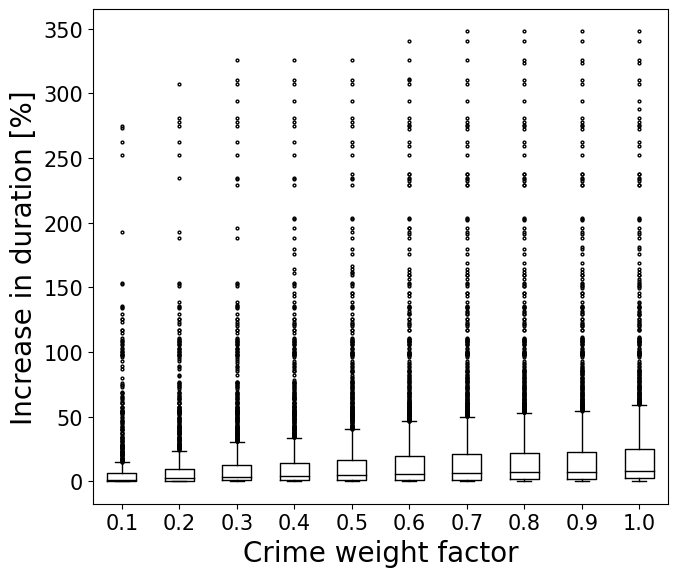

In [52]:
fig, ax1 = plt.subplots(figsize=(7, 6))

flierprops = dict(marker='o', color='black', markersize=2)
combined_df.plot(kind='box', ax=ax1, 
                 color=dict(boxes='black', whiskers='black', medians='black', caps='black'), 
                 flierprops=flierprops)

ax1.set_xlabel('Crime weight factor', fontsize=20)
ax1.set_ylabel('Increase in duration [%]', fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=15)

# # Define the file path and save
# plot_file_path = os.path.join(figure_output_folder_path, 'increase_duration_x_crime weight.png')
# plt.savefig(plot_file_path)

plt.tight_layout()
plt.show()


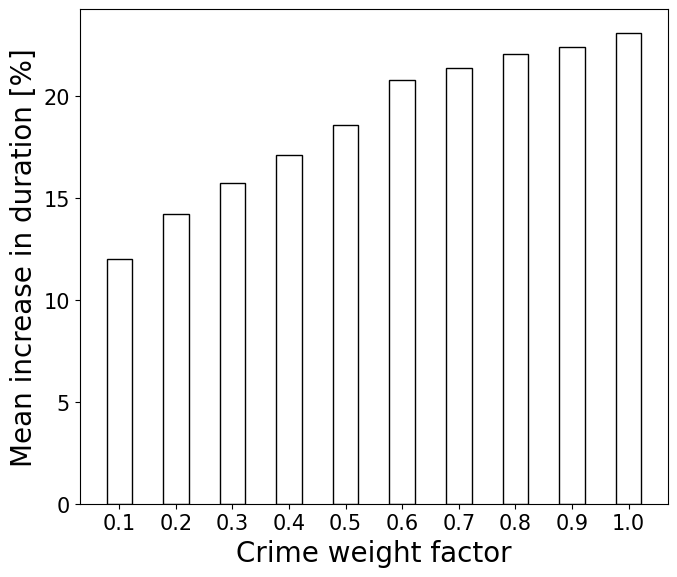

In [53]:
fig, ax2 = plt.subplots(figsize=(7, 6))

# Plotting the mean of the duration increase
mean_values = combined_df.mean()
ax2.bar(mean_values.index, mean_values, color='white', edgecolor='black', width=0.45) # Adjusted bar width
ax2.set_xlabel('Crime weight factor', fontsize=20)
ax2.set_ylabel('Mean increase in duration [%]', fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

# # Define the file path and save
# plot_file_path = os.path.join(figure_output_folder_path, 'mean_increase_duration_x_crime weight.png')
# plt.savefig(plot_file_path)

plt.tight_layout()
plt.show()


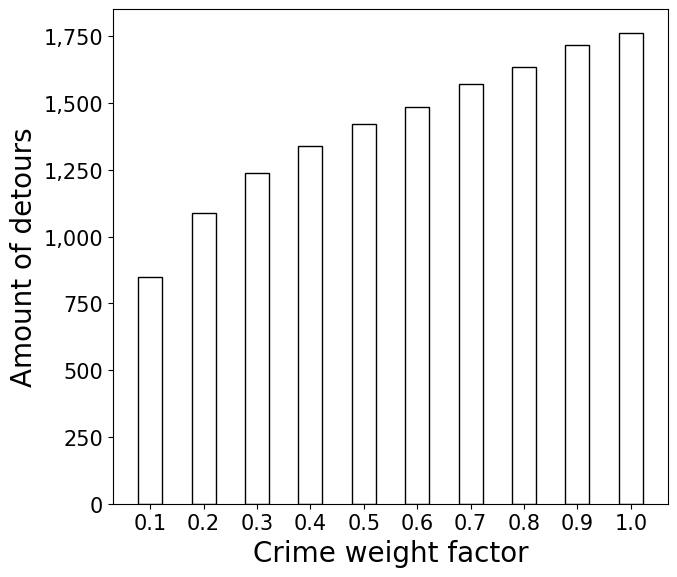

In [54]:
fig, ax3 = plt.subplots(figsize=(7, 6))

# Plotting the count of duration increase
ax3.bar(combined_df.count().index, combined_df.count(), color='white', edgecolor='black', width=0.45)
ax3.set_xlabel('Crime weight factor', fontsize=20)
ax3.set_ylabel('Amount of detours', fontsize=20)
ax3.tick_params(axis='both', which='major', labelsize=15)
ax3.set_xticklabels(ax1.get_xticklabels(), rotation=0)


def thousand_separator(x, pos): # Adding thousand separator to y-axis 
    return '{:,.0f}'.format(x)
ax3.yaxis.set_major_formatter(FuncFormatter(thousand_separator))

# Define the file path and save
plot_file_path = os.path.join(figure_output_folder_path, 'amountofdetour_x_crime weight.png')
plt.savefig(plot_file_path)

plt.tight_layout()
plt.show()


## similarity fraction between routes

In [55]:
similarity_ratios = pd.DataFrame({
    '0.1': route_data_01['similarity_ratio'],
    '0.2': route_data_02['similarity_ratio'],
    '0.3': route_data_03['similarity_ratio'],
    '0.4': route_data_04['similarity_ratio'],
    '0.5': route_data_05['similarity_ratio'],
    '0.6': route_data_06['similarity_ratio'],
    '0.7': route_data_07['similarity_ratio'],
    '0.8': route_data_08['similarity_ratio'],
    '0.9': route_data_09['similarity_ratio'],
    '1.0': route_data_10['similarity_ratio']
})
similarity_ratios.describe()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
count,20945.000000,20945.000000,20944.000000,20944.000000,20944.000000,20943.000000,20943.000000,20943.000000,20943.000000,20943.000000
mean,98.385692,97.752208,97.360144,97.077957,96.823452,96.586310,96.326805,96.124551,95.914832,95.777642
std,10.126784,11.952582,12.972213,13.682088,14.300443,14.899384,15.477532,15.935987,16.302080,16.580136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
50%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
75%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### routes with no change / similar route 

0.1    95.316305
0.2    94.175221
0.3    93.444736
0.4    92.972070
0.5    92.590117
0.6    92.279780
0.7    91.869181
0.8    91.577942
0.9    91.191215
1.0    90.962043
dtype: float64

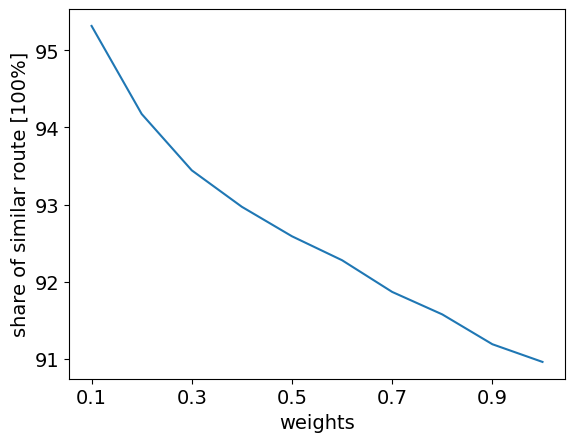

In [56]:
count_100s = similarity_ratios.apply(lambda x: (x == 100).sum())
share_of_100s = similarity_ratios.apply(lambda x: (x == 100).sum()) / len(similarity_ratios) *100
share_of_100s.plot(xlabel='weights',ylabel='share of similar route [100%]')
share_of_100s

In [57]:
# similarity_ratios = similarity_ratios[similarity_ratios!=0]
similarity_ratios = similarity_ratios[similarity_ratios < 100]  # filtering same routes
similarity_ratios.describe()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
count,895.000000,1135.000000,1287.000000,1387.000000,1467.000000,1532.000000,1618.000000,1679.000000,1760.000000,1808.000000
mean,62.221588,58.519825,57.040296,55.876514,54.649198,53.333616,52.455055,51.659598,51.388825,51.090246
std,32.167675,31.776999,31.733273,31.770974,31.741859,31.886970,31.864220,31.917349,31.596231,31.608079
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.437194,32.808317,30.590416,28.716285,27.083574,25.075416,24.116923,22.794465,22.809605,22.607498
50%,71.392330,64.547007,62.875165,61.947772,60.165655,58.229228,56.263182,54.680671,54.622295,54.326104
75%,91.208521,86.594679,85.163630,84.268708,82.825530,81.636935,80.906760,80.559782,79.455456,79.407232
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


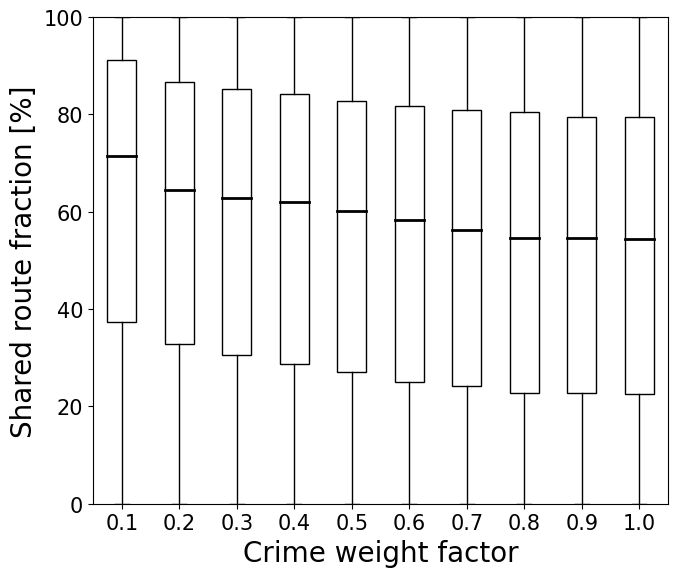

In [58]:
fig, ax4 = plt.subplots(figsize=(7, 6))

# Plotting the first boxplot
similarity_ratios.plot.box(ax=ax4, patch_artist=True, 
                           boxprops=dict(facecolor='white', color='black'), 
                           whiskerprops=dict(color='black'),
                           capprops=dict(color='black'),
                           flierprops=dict(markeredgecolor='black'),
                           medianprops=dict(color='black', linewidth=2))

ax4.set_xlabel('Crime weight factor', fontsize=20)
ax4.set_ylabel('Shared route fraction [%]', fontsize=20)
ax4.set_xticklabels(similarity_ratios.columns)
ax4.set_ylim(0, 100)
ax4.tick_params(axis='both', which='major', labelsize=15)


# # Define the file path and save
# plot_file_path = os.path.join(figure_output_folder_path, 'sharedroute_x_crime_weight.png')
# plt.savefig(plot_file_path)

plt.tight_layout()
plt.show()


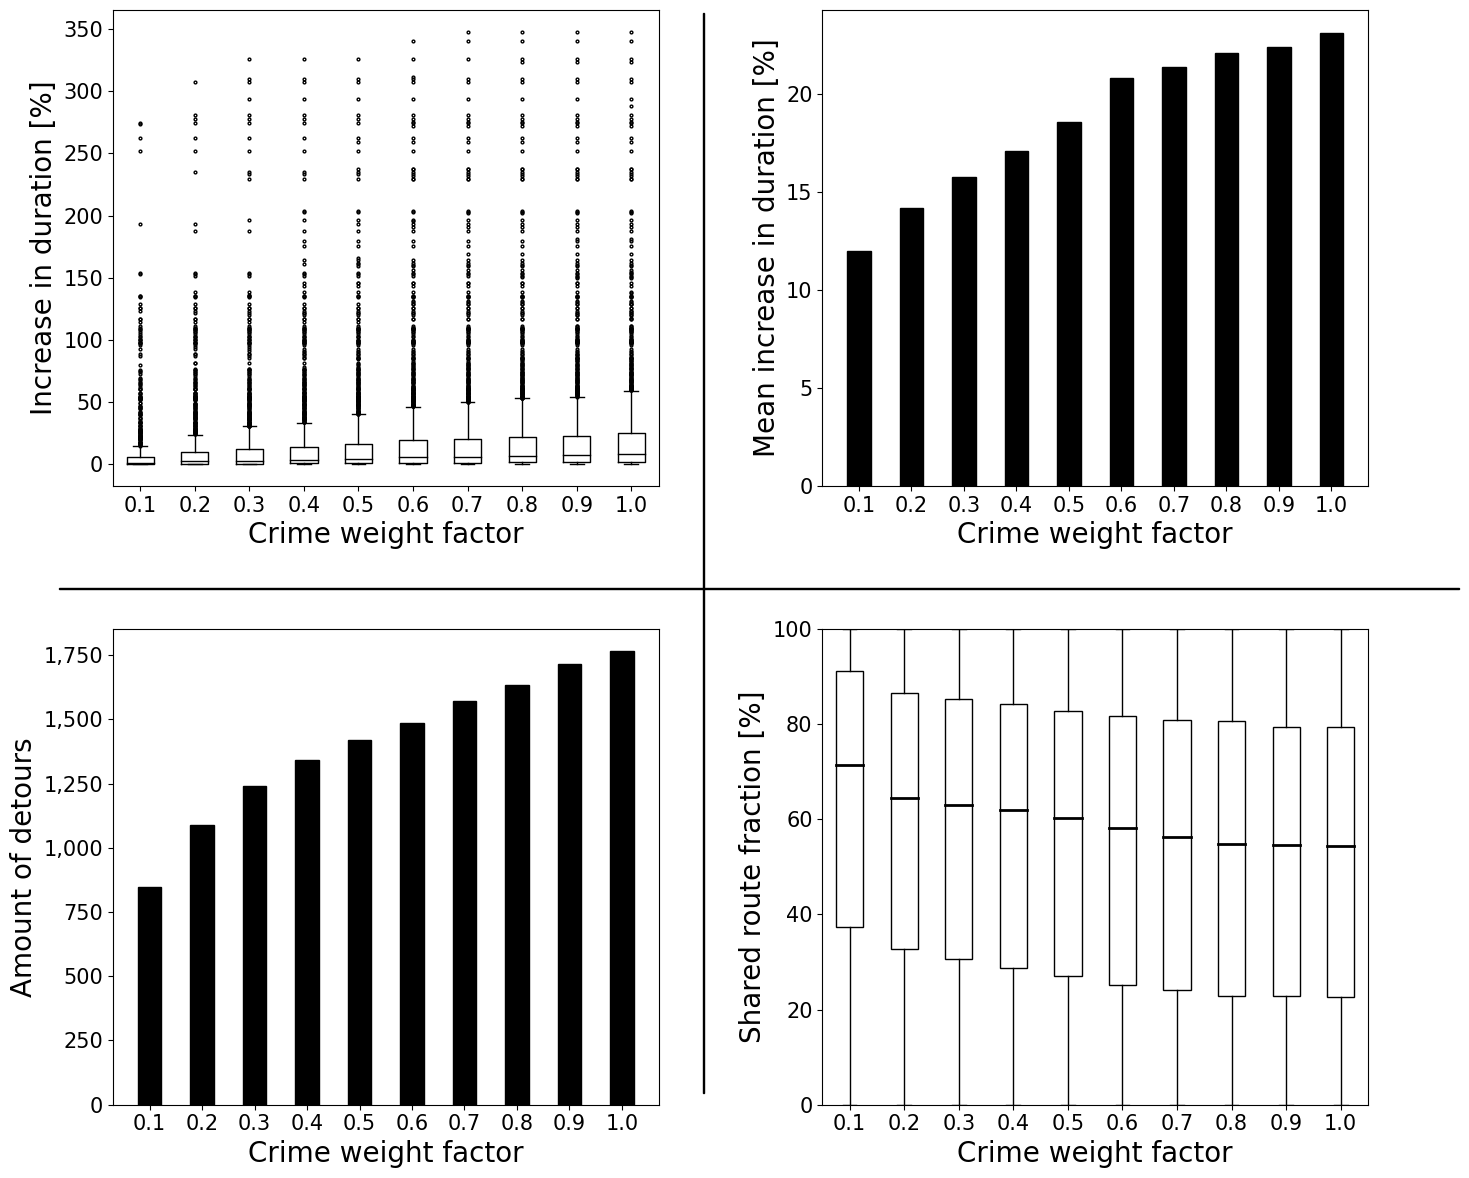

In [60]:
# Helper function to set common properties for axes
def set_common_properties(ax, xlabel, ylabel, xticklabels=None, yformatter=None):
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)
    if xticklabels is not None:
        ax.set_xticklabels(xticklabels, rotation=0)
    if yformatter is not None:
        ax.yaxis.set_major_formatter(yformatter)

# Create a figure with four subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 12))

# Plot ax1
flierprops = dict(marker='o', color='black', markersize=2)
combined_df.plot(kind='box', ax=ax1, 
                 color=dict(boxes='black', whiskers='black', medians='black', caps='black'), 
                 flierprops=flierprops)
set_common_properties(ax1, 'Crime weight factor', 'Increase in duration [%]')

# Plot ax2
ax2.bar(mean_values.index, mean_values, color='black', edgecolor='black', width=0.45)
set_common_properties(ax2, 'Crime weight factor', 'Mean increase in duration [%]')

# Plot ax3
ax3.bar(combined_df.count().index, combined_df.count(), color='black', edgecolor='black', width=0.45)
set_common_properties(ax3, 'Crime weight factor', 'Amount of detours')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
ax3.yaxis.set_major_formatter(FuncFormatter(thousand_separator))

# Plot ax4
similarity_ratios.plot.box(ax=ax4, patch_artist=True, 
                           boxprops=dict(facecolor='white', color='black'), 
                           whiskerprops=dict(color='black'),
                           capprops=dict(color='black'),
                           flierprops=dict(markeredgecolor='black'),
                           medianprops=dict(color='black', linewidth=2))
set_common_properties(ax4, 'Crime weight factor', 'Shared route fraction [%]')
ax4.set_xticklabels(similarity_ratios.columns)
ax4.set_ylim(0, 100)

# Add separators between the subplots
# Horizontal line
fig.add_artist(patches.FancyBboxPatch((0.05, 0.5), 1, 0.001, boxstyle="square,pad=0", edgecolor='black', facecolor='black'))
# Vertical line
fig.add_artist(patches.FancyBboxPatch((0.51, 0.08), 0.001, 0.9, boxstyle="square,pad=0", edgecolor='black', facecolor='black'))

# Adjust layout to make it more compact
plt.tight_layout()

# Define the file path and save
plot_file_path = os.path.join(figure_output_folder_path, 'Figure_10.png')
plt.savefig(plot_file_path)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


## Duration descriptions

In [72]:

pd_dict = {}
route_data_list = [
    route_data_01, route_data_02, route_data_03, route_data_04, route_data_05,
    route_data_06, route_data_07, route_data_08, route_data_09, route_data_10
]


for i, data in enumerate(route_data_list, start=1):
    key = f"{i / 10:.1f}"  
    pd_dict[key] = data[['Id', 'route_duration_short', 'route_duration_safe', 'route_distance_safe', 'route_distance_short']]

# Initialize dictionaries to hold the describe results
describe_short_duration = {}
describe_safe_duration = {}
describe_short_distance = {}
describe_safe_distance = {}

# Calculate describe for each DataFrame in the dictionary
for key, df in pd_dict.items():
    describe_short_duration[key] = df['route_duration_short'].describe()
    describe_safe_duration[key] = df['route_duration_safe'].describe()
    describe_short_distance[key] = df['route_distance_short'].describe()
    describe_safe_distance[key] = df['route_distance_safe'].describe()

# Create DataFrames from the describe dictionaries
describe_short_duration_df = pd.DataFrame(describe_short_duration)
describe_safe_duration_df = pd.DataFrame(describe_safe_duration)
describe_short_distance_df = pd.DataFrame(describe_short_distance)
describe_safe_distance_df = pd.DataFrame(describe_safe_distance)


In [ ]:
# To convert the last column into a DataFrame
short_duration_df = describe_short_duration_df.iloc[:, -1:].copy()
# short_duration_df.to_latex("Duration_short_abs.tex")
short_duration_df

,1.0
count,20943.000000
mean,18.489986
std,22.116667
min,0.003333
25%,5.690833
50%,10.965000
75%,22.296667
max,181.081667


In [ ]:
# To convert the last column into a DataFrame
short_distance_df = describe_short_distance_df.iloc[:, -1:].copy()
# short_distance_df.to_latex("distance_short_abs.tex")
short_distance_df

,1.0
count,20943.000000
mean,1.540842
std,1.843063
min,0.000300
25%,0.474200
50%,0.913800
75%,1.858100
max,15.090200


In [ ]:
# describe_safe_duration_df.to_latex('Duration_safe_abs.tex')
describe_safe_duration_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
count,20945.000000,20945.000000,20944.000000,20944.000000,20944.000000,20943.000000,20943.000000,20943.000000,20943.000000,20943.000000
mean,18.603899,18.629779,18.651548,18.667395,18.694196,18.719788,18.743107,18.757809,18.769727,18.781512
std,22.315793,22.320367,22.324170,22.324236,22.358049,22.371761,22.404344,22.406407,22.407551,22.409057
min,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
25%,5.703333,5.713333,5.724583,5.730000,5.741667,5.748333,5.754167,5.759167,5.765000,5.769167
50%,11.020000,11.056667,11.084167,11.103333,11.128333,11.155000,11.171667,11.176667,11.190000,11.205000
75%,22.331667,22.363333,22.378333,22.388750,22.421250,22.497500,22.500000,22.562500,22.575833,22.601667
max,181.081667,181.081667,181.081667,181.081667,181.081667,181.081667,181.081667,181.081667,181.081667,181.081667


In [ ]:
# describe_safe_distance_df.to_latex('distance_safe_abs.tex')
describe_safe_distance_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
count,20945.000000,20945.000000,20944.000000,20944.000000,20944.000000,20943.000000,20943.000000,20943.000000,20943.000000,20943.000000
mean,1.550335,1.552492,1.554306,1.555627,1.557860,1.559993,1.561936,1.563161,1.564154,1.565136
std,1.859657,1.860038,1.860355,1.860360,1.863178,1.864321,1.867036,1.867208,1.867303,1.867429
min,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300
25%,0.475300,0.476100,0.477075,0.477500,0.478500,0.479050,0.479550,0.480000,0.480450,0.480750
50%,0.918300,0.921400,0.923700,0.925250,0.927400,0.929700,0.930900,0.931500,0.932500,0.933800
75%,1.861000,1.863600,1.864825,1.865725,1.868500,1.874800,1.875000,1.880250,1.881350,1.883500
max,15.090200,15.090200,15.090200,15.090200,15.090200,15.090200,15.090200,15.090200,15.090200,15.090200


# crime index on street

Filter if there's any inf value in ratio mean increase

In [62]:
route_data_10['increase_ratio_mean'] = ((route_data_10['route_csv_mean_safe'] - route_data_10['route_csv_mean_short']) / route_data_10['route_csv_mean_short'] * 100) 
route_data_10['increase_ratio_max'] = ((route_data_10['route_csv_max_safe'] - route_data_10['route_csv_max_short']) / route_data_10['route_csv_max_short']* 100)

In [63]:
inf_rows = route_data_10[route_data_10["increase_ratio_mean"] == float("inf")] # max is also same rows
abs_data = route_data_10[~np.isinf(route_data_10["increase_ratio_mean"])]
abs_data.describe()

,Id,route_durationdn_short,route_distancedn_short,route_csv_max_short,route_csv_mean_short,intersects_polygon,route_durationdn_safe,route_distancedn_safe,route_csv_max_safe,route_csv_mean_safe,similarity_ratio,sum,percentage_increase_dur,percentage_increase_dis,increase_ratio_mean,increase_ratio_max
count,20938.000000,20938.000000,20938.000000,20938.000000,20938.000000,20938.000000,20938.000000,20938.000000,20938.000000,20938.000000,20938.000000,2.093800e+04,20938.000000,20938.000000,3733.000000,3733.000000
mean,15177.470771,18.489244,1.540780,1.939058,0.428557,0.996322,18.780671,1.565066,1.261295,0.199415,95.793899,5.475354e+01,1.947528,1.947533,-27.659120,-17.055217
std,8870.905393,22.119016,1.843259,8.839124,2.328928,0.060532,22.411427,1.867626,7.002232,1.195933,16.545690,8.288753e+01,13.825836,13.825505,41.901266,42.181785
min,7.000000,0.003333,0.000300,0.000000,0.000000,0.000000,0.003333,0.000300,0.000000,0.000000,0.000000,9.129396e-07,0.000000,0.000000,-100.000000,-100.000000
25%,7188.250000,5.688750,0.474100,0.000000,0.000000,1.000000,5.768333,0.480625,0.000000,0.000000,100.000000,2.010910e+00,0.000000,0.000000,-58.874459,0.000000
50%,15803.500000,10.960833,0.913400,0.000000,0.000000,1.000000,11.203333,0.933600,0.000000,0.000000,100.000000,2.110084e+01,0.000000,0.000000,0.000000,0.000000
75%,22837.750000,22.291250,1.857650,0.000000,0.000000,1.000000,22.600000,1.883400,0.000000,0.000000,100.000000,7.965511e+01,0.000000,0.000000,0.000000,0.000000
max,29628.000000,181.081667,15.090200,100.000000,50.000000,1.000000,181.081667,15.090200,100.000000,39.583333,100.000000,1.301276e+03,347.966653,348.008785,602.217742,866.666667


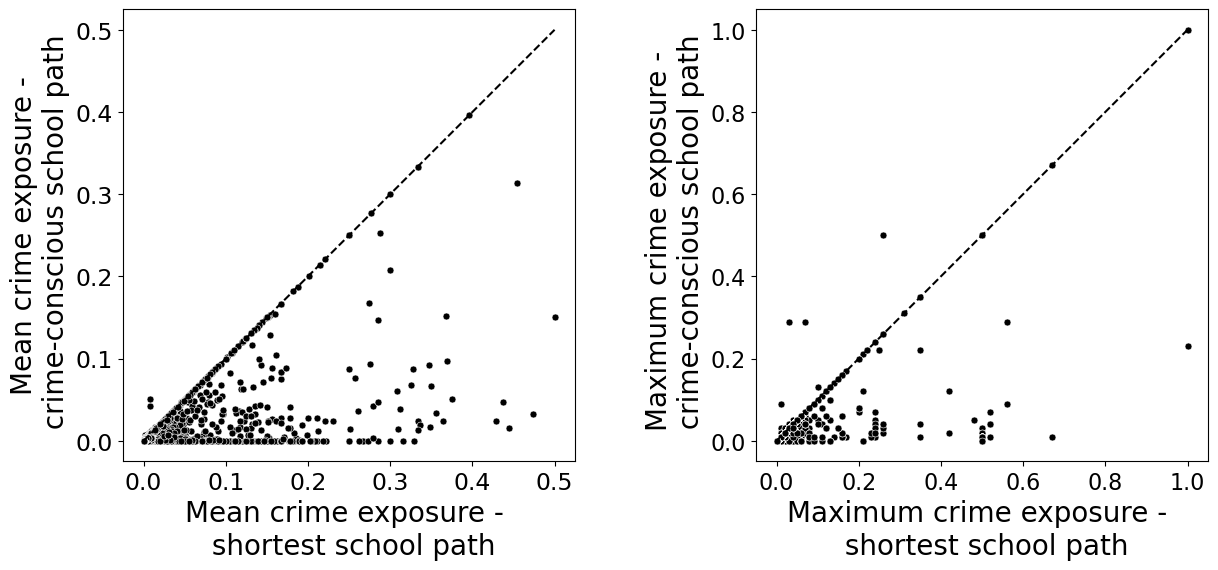

In [64]:
# Update font size
plt.rcParams.update({'font.size': 14})

# Normalize the data
columns_to_divide = ['route_csv_mean_safe', 'route_csv_mean_short', 'route_csv_max_safe', 'route_csv_max_short']
abs_data[columns_to_divide] = abs_data[columns_to_divide] / 100

# Create a figure with two square subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# First plot: Mean crime exposure
sns.scatterplot(data=abs_data, x='route_csv_mean_short', y='route_csv_mean_safe', color='black', s=25, ax=ax1)
ax1.plot([abs_data['route_csv_mean_short'].min(), abs_data['route_csv_mean_short'].max()], 
         [abs_data['route_csv_mean_short'].min(), abs_data['route_csv_mean_short'].max()], 
         linestyle='--', color='black')
ax1.set_xlabel('Mean crime exposure - \n shortest school path', fontsize=20)
ax1.set_ylabel('Mean crime exposure -\n crime-conscious school path', fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_aspect('equal', adjustable='box')

# Second plot: Max crime exposure
sns.scatterplot(data=abs_data, x='route_csv_max_short', y='route_csv_max_safe', color='black', s=25, ax=ax2)
ax2.plot([abs_data['route_csv_max_short'].min(), abs_data['route_csv_max_short'].max()], 
         [abs_data['route_csv_max_short'].min(), abs_data['route_csv_max_short'].max()], 
         linestyle='--', color='black')
ax2.set_xlabel('Maximum crime exposure - \n shortest school path', fontsize=20)
ax2.set_ylabel('Maximum crime exposure - \n crime-conscious school path', fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.set_aspect('equal', adjustable='box')

# Define the file path and save
plot_file_path = os.path.join(figure_output_folder_path, 'increase_duration_x_crime weight.png')
plt.savefig(plot_file_path)


# Adjust layout to make it more compact and add space between subplots
plt.subplots_adjust(wspace=0.4)
plt.show()

## total absolute stats

In [65]:

total_route = len(route_data_10)

# Calculating counts and shares for mean crime level
count_avoid_less_than_zero_mean = len(route_data_10[route_data_10['increase_ratio_mean'] < 0])
count_avoid_more_than_zero_mean = len(route_data_10[route_data_10['increase_ratio_mean'] > 0])
count_avoid_zero_mean = len(route_data_10[route_data_10['increase_ratio_mean'] == 0])

share_avoid_less_than_zero_mean = count_avoid_less_than_zero_mean / total_route * 100
share_avoid_more_than_zero_mean = count_avoid_more_than_zero_mean / total_route * 100
share_avoid_zero_mean = count_avoid_zero_mean / total_route * 100

# Printing results for mean crime level
print(f"Share of change in Mean crime level (Total routes: {total_route}):")
print(f"Decrease in crime level (<0): {share_avoid_less_than_zero_mean:.2f}% ({count_avoid_less_than_zero_mean})")
print(f"Increase in crime level (>0): {share_avoid_more_than_zero_mean:.2f}% ({count_avoid_more_than_zero_mean})")
print(f"No change in crime level (=0): {share_avoid_zero_mean:.2f}% ({count_avoid_zero_mean})")
print('--------------------------------------------------------')

# Calculating counts and shares for max crime level
count_avoid_less_than_zero_max = len(route_data_10[route_data_10['increase_ratio_max'] < 0])
count_avoid_more_than_zero_max = len(route_data_10[route_data_10['increase_ratio_max'] > 0])
count_avoid_zero_max = len(route_data_10[route_data_10['increase_ratio_max'] == 0])

share_avoid_less_than_zero_max = count_avoid_less_than_zero_max / total_route * 100
share_avoid_more_than_zero_max = count_avoid_more_than_zero_max / total_route * 100
share_avoid_zero_max = count_avoid_zero_max / total_route * 100

# Printing results for max crime level
print(f"Share of change in Max crime level (Total routes: {total_route}):")
print(f"Decrease in crime level (<0): {share_avoid_less_than_zero_max:.2f}% ({count_avoid_less_than_zero_max})")
print(f"Increase in crime level (>0): {share_avoid_more_than_zero_max:.2f}% ({count_avoid_more_than_zero_max})")
print(f"No change in crime level (=0): {share_avoid_zero_max:.2f}% ({count_avoid_zero_max})")
print('--------------------------------------------------------')


Share of change in Mean crime level (Total routes: 20943):
Decrease in crime level (<0): 7.98% (1672)
Increase in crime level (>0): 0.28% (58)
No change in crime level (=0): 9.59% (2008)
--------------------------------------------------------
Share of change in Max crime level (Total routes: 20943):
Decrease in crime level (<0): 3.80% (795)
Increase in crime level (>0): 0.16% (33)
No change in crime level (=0): 13.89% (2910)
--------------------------------------------------------


In [51]:

total_route = len(route_data_10)

# Calculating counts and shares for mean crime level
count_avoid_less_than_zero_mean = len(route_data_10[route_data_10['increase_ratio_mean'] < 0])
count_avoid_more_than_zero_mean = len(route_data_10[route_data_10['increase_ratio_mean'] > 0])
count_avoid_zero_mean = len(route_data_10[route_data_10['increase_ratio_mean'] == 0])

share_avoid_less_than_zero_mean = count_avoid_less_than_zero_mean / total_route * 100
share_avoid_more_than_zero_mean = count_avoid_more_than_zero_mean / total_route * 100
share_avoid_zero_mean = count_avoid_zero_mean / total_route * 100

# Printing results for mean crime level
print(f"Share of change in Mean crime level (Total routes: {total_route}):")
print(f"Decrease in crime level (<0): {share_avoid_less_than_zero_mean:.2f}% ({count_avoid_less_than_zero_mean})")
print(f"Increase in crime level (>0): {share_avoid_more_than_zero_mean:.2f}% ({count_avoid_more_than_zero_mean})")
print(f"No change in crime level (=0): {share_avoid_zero_mean:.2f}% ({count_avoid_zero_mean})")
print('--------------------------------------------------------')

# Calculating counts and shares for max crime level
count_avoid_less_than_zero_max = len(route_data_10[route_data_10['increase_ratio_max'] < 0])
count_avoid_more_than_zero_max = len(route_data_10[route_data_10['increase_ratio_max'] > 0])
count_avoid_zero_max = len(route_data_10[route_data_10['increase_ratio_max'] == 0])

share_avoid_less_than_zero_max = count_avoid_less_than_zero_max / total_route * 100
share_avoid_more_than_zero_max = count_avoid_more_than_zero_max / total_route * 100
share_avoid_zero_max = count_avoid_zero_max / total_route * 100

# Printing results for max crime level
print(f"Share of change in Max crime level (Total routes: {total_route}):")
print(f"Decrease in crime level (<0): {share_avoid_less_than_zero_max:.2f}% ({count_avoid_less_than_zero_max})")
print(f"Increase in crime level (>0): {share_avoid_more_than_zero_max:.2f}% ({count_avoid_more_than_zero_max})")
print(f"No change in crime level (=0): {share_avoid_zero_max:.2f}% ({count_avoid_zero_max})")
print('--------------------------------------------------------')


Share of change in Mean crime level (Total routes: 20938):
Decrease in crime level (<0): 7.99% (1672)
Increase in crime level (>0): 0.25% (53)
No change in crime level (=0): 9.59% (2008)
--------------------------------------------------------
Share of change in Max crime level (Total routes: 20938):
Decrease in crime level (<0): 3.80% (795)
Increase in crime level (>0): 0.13% (28)
No change in crime level (=0): 13.90% (2910)
--------------------------------------------------------


## mean abs stats

In [66]:

# Filter data for each intersects_polygon category
avoid_polygon_routes = route_data_10[route_data_10['intersects_polygon'] == 0]
no_avoid_polygon_routes = route_data_10[route_data_10['intersects_polygon'] == 1]

# Calculate shares and counts for avoid polygon routes (mean crime level)
total_avoid = len(avoid_polygon_routes)
count_avoid_less_than_zero_mean = len(avoid_polygon_routes[avoid_polygon_routes['increase_ratio_mean'] < 0])
count_avoid_more_than_zero_mean = len(avoid_polygon_routes[avoid_polygon_routes['increase_ratio_mean'] > 0])
count_avoid_zero_mean = len(avoid_polygon_routes[avoid_polygon_routes['increase_ratio_mean'] == 0])

share_avoid_less_than_zero_mean = count_avoid_less_than_zero_mean / total_avoid * 100
share_avoid_more_than_zero_mean = count_avoid_more_than_zero_mean / total_avoid * 100
share_avoid_zero_mean = count_avoid_zero_mean / total_avoid * 100

# Calculate shares and counts for no avoid polygon routes (mean crime level)
total_no_avoid = len(no_avoid_polygon_routes)
count_no_avoid_less_than_zero_mean = len(no_avoid_polygon_routes[no_avoid_polygon_routes['increase_ratio_mean'] < 0])
count_no_avoid_more_than_zero_mean = len(no_avoid_polygon_routes[no_avoid_polygon_routes['increase_ratio_mean'] > 0])
count_no_avoid_zero_mean = len(no_avoid_polygon_routes[no_avoid_polygon_routes['increase_ratio_mean'] == 0])

share_no_avoid_less_than_zero_mean = count_no_avoid_less_than_zero_mean / total_no_avoid * 100
share_no_avoid_more_than_zero_mean = count_no_avoid_more_than_zero_mean / total_no_avoid * 100
share_no_avoid_zero_mean = count_no_avoid_zero_mean / total_no_avoid * 100

# Printing results for mean crime level by polygon intersection
print(f"Share of change in Mean crime level for 'Avoid polygon routes' (Total: {total_avoid}):")
print(f"Decrease in crime level (<0): {share_avoid_less_than_zero_mean:.2f}% ({count_avoid_less_than_zero_mean})")
print(f"Increase in crime level (>0): {share_avoid_more_than_zero_mean:.2f}% ({count_avoid_more_than_zero_mean})")
print(f"No change in crime level (=0): {share_avoid_zero_mean:.2f}% ({count_avoid_zero_mean})")
print('--------------------------------------------------------')

print(f"Share of change in Mean crime level for 'No Avoid polygon routes' (Total: {total_no_avoid}):")
print(f"Decrease in crime level (<0): {share_no_avoid_less_than_zero_mean:.2f}% ({count_no_avoid_less_than_zero_mean})")
print(f"Increase in crime level (>0): {share_no_avoid_more_than_zero_mean:.2f}% ({count_no_avoid_more_than_zero_mean})")
print(f"No change in crime level (=0): {share_no_avoid_zero_mean:.2f}% ({count_no_avoid_zero_mean})")
print('--------------------------------------------------------')


Share of change in Mean crime level for 'Avoid polygon routes' (Total: 82):
Decrease in crime level (<0): 52.44% (43)
Increase in crime level (>0): 10.98% (9)
No change in crime level (=0): 0.00% (0)
--------------------------------------------------------
Share of change in Mean crime level for 'No Avoid polygon routes' (Total: 20861):
Decrease in crime level (<0): 7.81% (1629)
Increase in crime level (>0): 0.23% (49)
No change in crime level (=0): 9.63% (2008)
--------------------------------------------------------


## max abs stat

In [67]:

# Calculate shares and counts for avoid polygon routes (max crime level)
count_avoid_less_than_zero_max = len(avoid_polygon_routes[avoid_polygon_routes['increase_ratio_max'] < 0])
count_avoid_more_than_zero_max = len(avoid_polygon_routes[avoid_polygon_routes['increase_ratio_max'] > 0])
count_avoid_zero_max = len(avoid_polygon_routes[avoid_polygon_routes['increase_ratio_max'] == 0])

share_avoid_less_than_zero_max = count_avoid_less_than_zero_max / total_avoid * 100
share_avoid_more_than_zero_max = count_avoid_more_than_zero_max / total_avoid * 100
share_avoid_zero_max = count_avoid_zero_max / total_avoid * 100

# Calculate shares and counts for no avoid polygon routes (max crime level)
count_no_avoid_less_than_zero_max = len(no_avoid_polygon_routes[no_avoid_polygon_routes['increase_ratio_max'] < 0])
count_no_avoid_more_than_zero_max = len(no_avoid_polygon_routes[no_avoid_polygon_routes['increase_ratio_max'] > 0])
count_no_avoid_zero_max = len(no_avoid_polygon_routes[no_avoid_polygon_routes['increase_ratio_max'] == 0])

share_no_avoid_less_than_zero_max = count_no_avoid_less_than_zero_max / total_no_avoid * 100
share_no_avoid_more_than_zero_max = count_no_avoid_more_than_zero_max / total_no_avoid * 100
share_no_avoid_zero_max = count_no_avoid_zero_max / total_no_avoid * 100

# Printing results for max crime level by polygon intersection
print(f"Share of change in Max crime level for 'Avoid polygon routes' (Total: {total_avoid}):")
print(f"Decrease in crime level (<0): {share_avoid_less_than_zero_max:.2f}% ({count_avoid_less_than_zero_max})")
print(f"Increase in crime level (>0): {share_avoid_more_than_zero_max:.2f}% ({count_avoid_more_than_zero_max})")
print(f"No change in crime level (=0): {share_avoid_zero_max:.2f}% ({count_avoid_zero_max})")
print('--------------------------------------------------------')

print(f"Share of change in Max crime level for 'No Avoid polygon routes' (Total: {total_no_avoid}):")
print(f"Decrease in crime level (<0): {share_no_avoid_less_than_zero_max:.2f}% ({count_no_avoid_less_than_zero_max})")
print(f"Increase in crime level (>0): {share_no_avoid_more_than_zero_max:.2f}% ({count_no_avoid_more_than_zero_max})")
print(f"No change in crime level (=0): {share_no_avoid_zero_max:.2f}% ({count_no_avoid_zero_max})")
print('--------------------------------------------------------')


Share of change in Max crime level for 'Avoid polygon routes' (Total: 82):
Decrease in crime level (<0): 21.95% (18)
Increase in crime level (>0): 8.54% (7)
No change in crime level (=0): 32.93% (27)
--------------------------------------------------------
Share of change in Max crime level for 'No Avoid polygon routes' (Total: 20861):
Decrease in crime level (<0): 3.72% (777)
Increase in crime level (>0): 0.12% (26)
No change in crime level (=0): 13.82% (2883)
--------------------------------------------------------


In [68]:
#  functions to fin mean 
def mean_duration_increase(data, avp):
    zero_avp_intr = data[data['intersects_polygon'] == avp]
    mean_ir_mean_zero = zero_avp_intr['percentage_increase_dur'].mean()
    return mean_ir_mean_zero

def mean_mean_crime_exposure(data, avp):
    zero_avp_intr = data[data['intersects_polygon'] == avp]
    zero_avp_intr = zero_avp_intr[zero_avp_intr['increase_ratio_mean'] < 0]
    mean_ir_mean_zero = zero_avp_intr['increase_ratio_mean'].mean()
    return mean_ir_mean_zero

def mean_max_crime_exposure(data, avp):
    zero_avp_intr = data[data['intersects_polygon'] == avp]
    zero_avp_intr = zero_avp_intr[zero_avp_intr['increase_ratio_max'] < 0]
    mean_ir_mean_zero = zero_avp_intr['increase_ratio_max'].mean()
    return mean_ir_mean_zero


In [69]:
# filtering rows that had lesser crime exposure than short route
negative_mean_ratio_data = route_data_10[route_data_10['increase_ratio_mean'] < 0]
negative_mean_ratio_data.describe()

,Id,route_durationdn_short,route_distancedn_short,route_csv_max_short,route_csv_mean_short,intersects_polygon,route_durationdn_safe,route_distancedn_safe,route_csv_max_safe,route_csv_mean_safe,similarity_ratio,sum,percentage_increase_dur,percentage_increase_dis,increase_ratio_mean,increase_ratio_max
count,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000
mean,22170.674641,18.633584,1.552810,15.351675,3.663452,0.974282,21.704282,1.808706,6.827153,0.785847,50.585460,87.441787,22.396902,22.396925,-63.670607,-39.051881
std,6421.618032,19.959419,1.663293,20.810697,6.534405,0.158339,22.654378,1.887874,15.146819,1.907164,30.829114,109.694011,41.167915,41.166520,33.386813,50.732657
min,2329.000000,0.870000,0.072600,1.000000,0.012987,0.000000,0.901667,0.075100,0.000000,0.000000,0.000000,0.000053,0.000000,0.000000,-100.000000,-100.000000
25%,19430.750000,7.679167,0.639875,1.000000,0.400000,1.000000,9.386667,0.782225,0.000000,0.000000,22.840142,9.891143,2.143704,2.142078,-100.000000,-100.000000
50%,23216.000000,11.919167,0.993300,3.000000,0.945070,1.000000,14.041667,1.170200,1.000000,0.238095,53.410376,59.349543,7.987019,7.984259,-68.720458,0.000000
75%,27213.250000,19.872083,1.656025,50.000000,3.333333,1.000000,23.493333,1.957850,3.000000,0.727273,77.844592,122.142742,23.723873,23.733587,-33.035714,0.000000
max,29583.000000,135.226667,11.268900,100.000000,50.000000,1.000000,135.378333,11.281600,100.000000,31.375000,100.000000,1301.276408,347.966653,348.008785,-0.202020,800.000000


In [70]:

filtered_mean_data = negative_mean_ratio_data[negative_mean_ratio_data['percentage_increase_dur'] != 0] # filter routes which does has change in duration

filtered_mean_data['intersects_polygon'] = filtered_mean_data['intersects_polygon'].replace({
    0: 'Shortest school path crossing dispute area',
    1: 'Shortest school path not crossing dispute area'
})


RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

<Figure size 2000x1000 with 0 Axes>

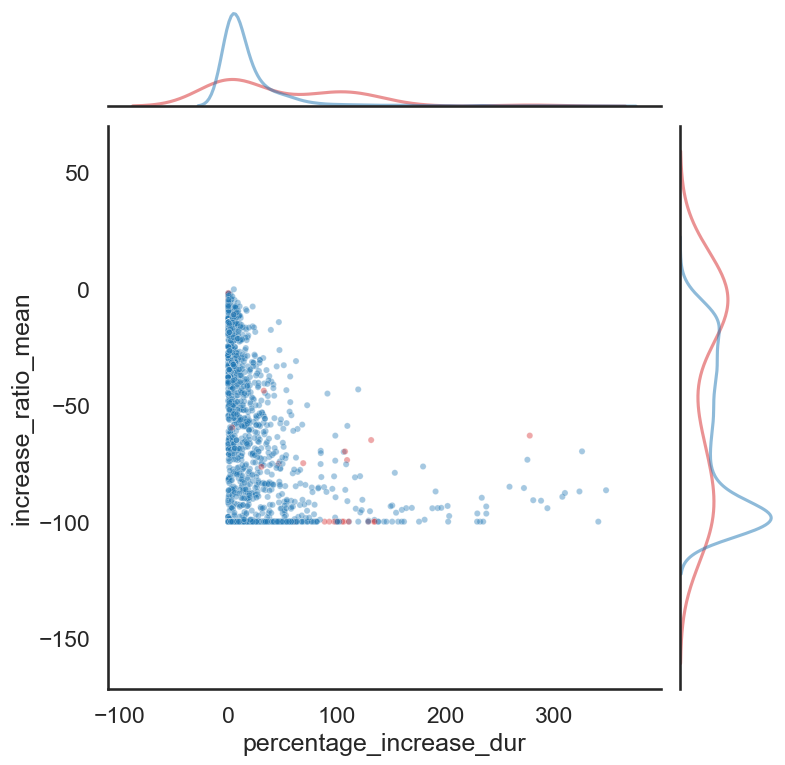

In [71]:
# Function to create each JointGrid plot
def create_joint_grid(data, x, y, hue, xlabel, ylabel, mean_plo, mean_plo_crime, lstyle):
    plt.figure(figsize=(20, 10))
    sns.set_style('white')
    sns.set_context('talk')
    
    g = sns.JointGrid(
        data=data,
        x=x,
        y=y,
        hue=hue,
        palette={
            'Shortest school path crossing dispute area': "tab:red",
            'Shortest school path not crossing dispute area': "tab:blue"
        },
        height=8  
    )
    scatter_kws = {'alpha': 0.4, 'legend': False, 's': 20}
    g.plot_joint(sns.scatterplot, **scatter_kws)
    g.plot_marginals(sns.kdeplot, fill=False, alpha=0.5, common_norm=False, legend=False)
    
    sns.regplot(x=x, y=y, data=data, scatter=False, lowess=True, ax=g.ax_joint, color='black', line_kws={'linewidth': 2})

    # Vertical lines for means
    mean_ir_mean_zero = mean_plo(data, 'Shortest school path crossing dispute area')
    mean_ir_mean_nonzero = mean_plo(data, 'Shortest school path not crossing dispute area')
    g.ax_joint.axvline(mean_ir_mean_zero, color='tab:red', linestyle='-')
    g.ax_joint.axvline(mean_ir_mean_nonzero, color='tab:blue', linestyle='-')

    # Horizontal lines for mean crime exposure
    mean_csv_mean_zero = mean_plo_crime(data, 'Shortest school path crossing dispute area')
    mean_csv_mean_nonzero = mean_plo_crime(data, 'Shortest school path not crossing dispute area')
    g.ax_joint.axhline(mean_csv_mean_zero, color='tab:red', linestyle=lstyle)
    g.ax_joint.axhline(mean_csv_mean_nonzero, color='tab:blue', linestyle=lstyle)

    g.set_axis_labels(xlabel, ylabel)
    g.ax_joint.set_xlabel(xlabel, fontsize=22)
    g.ax_joint.set_ylabel(ylabel, fontsize=22)
    g.ax_joint.tick_params(axis='both', which='major', labelsize=18)
    
    g.ax_joint.set_xlim(-20, 400)
    g.ax_joint.set_ylim(-110, 10)
    
    g.ax_joint.grid(False)
    sns.despine()
    
    return g

# Create the first plot
g1 = create_joint_grid(
    filtered_mean_data,
    x="percentage_increase_dur",
    y="increase_ratio_mean",
    hue="intersects_polygon",
    xlabel='Relative increase in travel time to closest school [%]',
    ylabel='Change in mean crime exposure [%]',
    mean_plo=mean_duration_increase,
    mean_plo_crime=mean_mean_crime_exposure,
    lstyle='--'
)

# Create the second plot
g2 = create_joint_grid(
    filtered_mean_data,
    x="percentage_increase_dur",
    y="increase_ratio_max",
    hue="intersects_polygon",
    xlabel='Relative increase in travel time to closest school [%]',
    ylabel='Change in maximum crime exposure [%]',
    mean_plo=mean_duration_increase,
    mean_plo_crime=mean_max_crime_exposure,
    lstyle=':'
)

# Legend 
legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='Shortest school path crossing dispute area',
           markerfacecolor='tab:red', markersize=10, alpha=0.4),
    Line2D([0], [0], marker='o', color='w', label='Shortest school path not crossing dispute area',
           markerfacecolor='tab:blue', markersize=10, alpha=0.4),
    Line2D([0], [0], color='black', linestyle='-', linewidth=2, label='LOWESS'),
    Line2D([0], [0], color='tab:red', linestyle='-', linewidth=2,
           label=f'Average increase in relative travel time - crossing dispute area: {mean_duration_increase(filtered_mean_data, "Shortest school path crossing dispute area"):.2f}%'),
    Line2D([0], [0], color='tab:blue', linestyle='-', linewidth=2,
           label=f'Average increase in relative travel time - not crossing dispute area: {mean_duration_increase(filtered_mean_data, "Shortest school path not crossing dispute area"):.2f}%'),
    Line2D([0], [0], color='tab:red', linestyle='--', linewidth=2,
           label=f'Average change in mean crime exposure - crossing dispute area: {mean_mean_crime_exposure(filtered_mean_data, "Shortest school path crossing dispute area"):.2f}%'),
    Line2D([0], [0], color='tab:blue', linestyle='--', linewidth=2,
           label=f'Average change in mean crime exposure - not crossing dispute area: {mean_mean_crime_exposure(filtered_mean_data, "Shortest school path not crossing dispute area"):.2f}%'),
    Line2D([0], [0], color='tab:red', linestyle=':', linewidth=2,
           label=f'Average change in maximum crime exposure - crossing dispute area: {mean_max_crime_exposure(filtered_mean_data, "Shortest school path crossing dispute area"):.2f}%'),
    Line2D([0], [0], color='tab:blue', linestyle=':', linewidth=2,
           label=f'Average change in maximum crime exposure - not crossing dispute area: {mean_max_crime_exposure(filtered_mean_data, "Shortest school path not crossing dispute area"):.2f}%')
]


plt.figure(figsize=(20, 10))
plt.legend(handles=legend_handles, loc='center', fontsize='medium')
plt.axis('off')
plt.show()


## other stats

In [58]:
def calculate_weighted_average(df, target_column):

    df['weighted_sum'] = df[target_column] *  df['intersects_polygon']# tt, mean , max 
    

    total_weighted_sum = df['weighted_sum'].mean()
    
    
    return total_weighted_sum


In [59]:
routea_10['intersects_polygon'] = 1 - route_data_10['intersects_polygon']

In [60]:
# Calculate weighted average for percentage_increase_dur (percentual travel time difference)
weighted_avg_travel_time_diff = calculate_weighted_average(route_data_10, 'percentage_increase_dur')

# Calculate weighted average for increase_ratio_mean (% percentual mean crime exposure)
weighted_avg_mean_crime_exposure = calculate_weighted_average(route_data_10, 'increase_ratio_mean')

# Calculate weighted average for increase_ratio_max (% max crime exposure)
weighted_avg_max_crime_exposure = calculate_weighted_average(route_data_10, 'increase_ratio_max')

# Print the results
print(f'The weighted average for percentual travel time difference is: {weighted_avg_travel_time_diff}')
print(f'The weighted average for % percentual mean crime exposure is: {weighted_avg_mean_crime_exposure}')
print(f'The weighted average for % max crime exposure is: {weighted_avg_max_crime_exposure}')

The weighted average for percentual travel time difference is: 0.24456722882126572
The weighted average for % percentual mean crime exposure is: -0.16048751712721956
The weighted average for % max crime exposure is: -0.07876978811883714


## detour plots

In [67]:
def plot_travel_time_vs_crime(safe_path, short_path, route_data, route_id):
    # Load data
    safe_data = pd.read_csv(safe_path)
    short_data = pd.read_csv(short_path)
    route_route_data = route_data[route_data['Id'] == route_id]
    
    # Extract total duration and distance
    total_duration_safe = route_route_data['route_duration_safe'].iloc[0]
    total_distance_safe = route_route_data['route_distance_safe'].iloc[0]
    total_duration_short = route_route_data['route_duration_short'].iloc[0]
    total_distance_short = route_route_data['route_distance_short'].iloc[0]

    # Convert geometry to GeoDataFrame
    safe_data['geometry'] = safe_data['geometry'].apply(wkt.loads)
    short_data['geometry'] = short_data['geometry'].apply(wkt.loads)
    gdf_safe = gpd.GeoDataFrame(safe_data, geometry='geometry')
    gdf_short = gpd.GeoDataFrame(short_data, geometry='geometry')
    
    # Set coordinate reference system
    gdf_safe.crs = "EPSG:4326"
    gdf_safe = gdf_safe.to_crs("EPSG:31983")
    gdf_short.crs = "EPSG:4326"
    gdf_short = gdf_short.to_crs("EPSG:31983")
    
    # Calculate length and travel time
    gdf_safe['length'] = gdf_safe.length
    gdf_short['length'] = gdf_short.length


    gdf_safe['travel_time'] = (gdf_safe['length'] / gdf_safe['length'].sum()) * total_duration_safe
    gdf_short['travel_time'] = (gdf_short['length'] / gdf_short['length'].sum()) * total_duration_short

    
    gdf_safe['cumulative_travel_time'] = gdf_safe['travel_time'].cumsum()
    gdf_short['cumulative_travel_time'] = gdf_short['travel_time'].cumsum()
    

    # Plotting cumulative travel time vs. crime exposure for both routes
    plt.figure(figsize=(12, 8))

    # Plot safe route with custom line style
    plt.plot(gdf_safe['cumulative_travel_time'], gdf_safe['csv'], label='Safe Route', color='#fb7a07', linewidth=3)

    # Plot short route with custom line style
    plt.plot(gdf_short['cumulative_travel_time'], gdf_short['csv'], label='Short Route', color='#cd121d', linewidth=2)

        # Adding a point at the end of each line
    plt.scatter(gdf_safe['cumulative_travel_time'].iloc[-1], gdf_safe['csv'].iloc[-1], color='#fb7a07', edgecolor='#fb7a07', zorder=5)
    plt.scatter(gdf_short['cumulative_travel_time'].iloc[-1], gdf_short['csv'].iloc[-1], color='#cd121d', edgecolor='#cd121d', zorder=5)
 
    # Customize x-axis and y-axis
    plt.xlabel('Travel time [min]', fontsize=24)
    plt.ylabel('Crime exposure', fontsize=24, labelpad=-30) 

    # plt.xticks(ticks=range(0, int(max(total_duration_safe, total_duration_short)) + 1, 20))  # Shorter intervals
    plt.xticks(ticks=range(0, int(max(total_duration_safe, total_duration_short)) + 1, 20), fontsize=24)  # Adjust fontsize as needed
    # Customize y-axis to display "Low" at the bottom and "High" at the top

    plt.gca().set_yticks(plt.gca().get_yticks())  # Set the y-ticks to their default positions
    # plt.gca().set_yticklabels(['Low' if i == 0 else 'High' if i == len(plt.gca().get_yticks()) - 1 else '' for i in range(len(plt.gca().get_yticks()))])

    plt.gca().set_yticklabels(['Low' if i == 0 else 'High' if i == len(plt.gca().get_yticks()) - 1 else '' for i in range(len(plt.gca().get_yticks()))], fontsize=24)  # Adjust fontsize as needed

    plt.show()

    print(f"Route duration in short route: {route_route_data['route_duration_short'].iloc[0]} (minutes)")
    print(f"Route duration in Crime consious route: {route_route_data['route_duration_safe'].iloc[0]} (minutes)")

    print(f"\nPercentage increase in travel time difference: {route_route_data['percentage_increase_dur'].iloc[0]}  %")

    # Calculate and print the result of dividing 'route_csv_mean_safe' by 'route_csv_mean_short'
    print(f"\nLonger travel time (safe route - short route): {route_route_data['route_duration_safe'].iloc[0] - route_route_data['route_durationdn_short'].iloc[0]} (minutes)")


    print('------------------------------------------------------------------')
    # print('crime exposure in range (0 to 1) ....max 0.5')

    print(f"\nMean crime exposure along the short route: {route_route_data['route_csv_mean_short'].iloc[0]} ")
    print(f"Mean crime exposure along the Crime consious route: {route_route_data['route_csv_mean_safe'].iloc[0]} ")

    print(f"\nPercentage decrease in mean crime exposure: {route_route_data['increase_ratio_mean'].iloc[0]}  %")


    # Calculate and print the result of dividing 'route_csv_mean_safe' by 'route_csv_mean_short'
    print(f"\nRatio of mean crime exposure (short route / safe route): {route_route_data['route_csv_mean_short'].iloc[0] / route_route_data['route_csv_mean_safe'].iloc[0]} times")



In [73]:

def load_paths_for_id(route_id):
    # Construct the full paths for safe and short paths using os.path.join
    safe_path = os.path.join(routing_output_folder_path, 'csv_factor_1.0', f'{route_id}.csv')  # folder with csv of crime consiuou route
    short_path = os.path.join(routing_output_folder_path, 'csv_factor_0.0', f'{route_id}.csv') # folder with csv of short route
    
    return safe_path, short_path

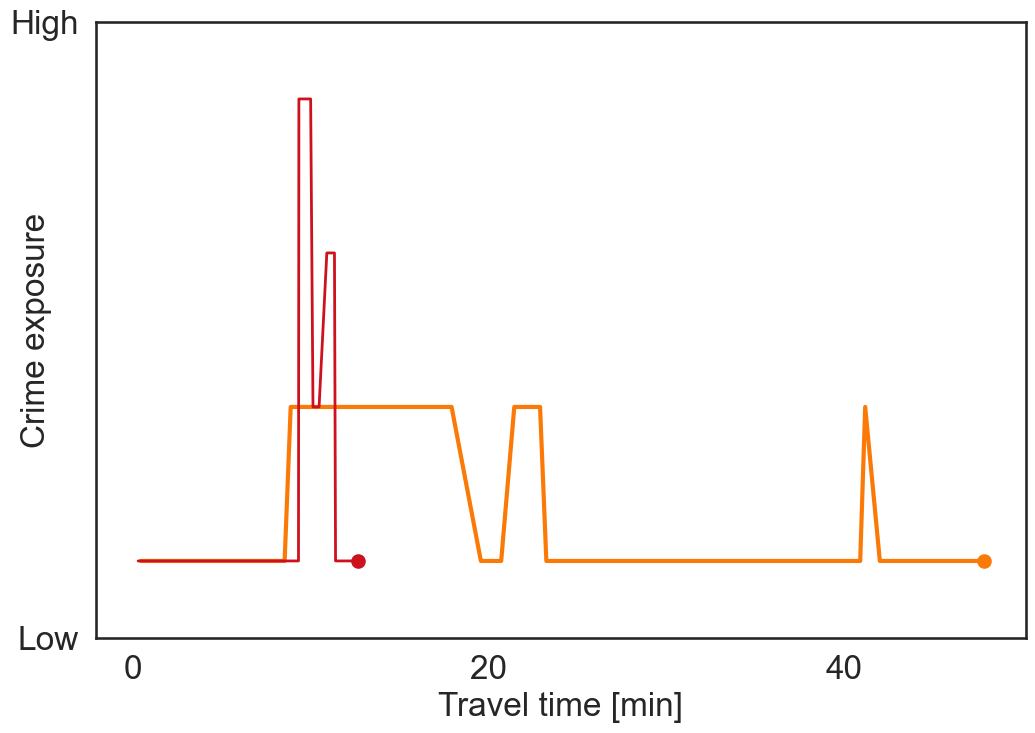

Route duration in short route: 12.66 (minutes)
Route duration in Crime consious route: 47.818333333333335 (minutes)

Percentage increase in travel time difference: 277.7119536598209  %

Longer travel time (safe route - short route): 35.15833333333333 (minutes)
------------------------------------------------------------------

Mean crime exposure along the short route: 0.7666666666666667 
Mean crime exposure along the Crime consious route: 0.2833333333333333 

Percentage decrease in mean crime exposure: -63.04347826086957  %

Ratio of mean crime exposure (short route / safe route): 2.7058823529411766 times


In [71]:
route_id = 20238
safe_path, short_path = load_paths_for_id(route_id)
plot_travel_time_vs_crime(safe_path, short_path, route_data_10, route_id)

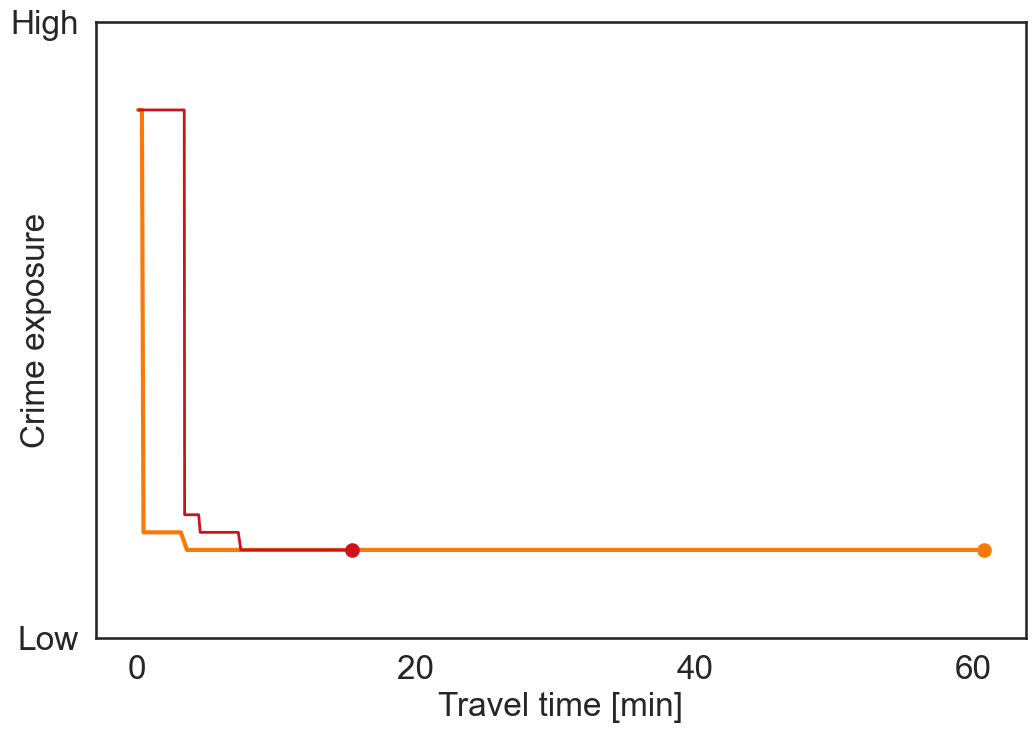

Route duration in short route: 15.413333333333332 (minutes)
Route duration in Crime consious route: 60.72 (minutes)

Percentage increase in travel time difference: 293.9446366782007  %

Longer travel time (safe route - short route): 45.306666666666665 (minutes)
------------------------------------------------------------------

Mean crime exposure along the short route: 21.17808219178082 
Mean crime exposure along the Crime consious route: 1.2258064516129032 

Percentage decrease in mean crime exposure: -94.21191002795976  %

Ratio of mean crime exposure (short route / safe route): 17.27685652487383 times


In [72]:
route_id = 28893
safe_path, short_path = load_paths_for_id(route_id)
plot_travel_time_vs_crime(safe_path, short_path, route_data_10, route_id)